In [1]:
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries for linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Saving model
import joblib 

In [2]:
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. Regression Practice Projects - ED & ML\Concrete Strength Regression\Concrete_Data.csv")
df.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 1030 rows and 9 columns.


## Data Manipulation

In [4]:
# Rename the columns
df.columns = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']

cols = list(df.columns)

print(f"Columns: {cols}.")

Columns: ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength'].


Each colunm represents 

## Data Visualisation - Base Data

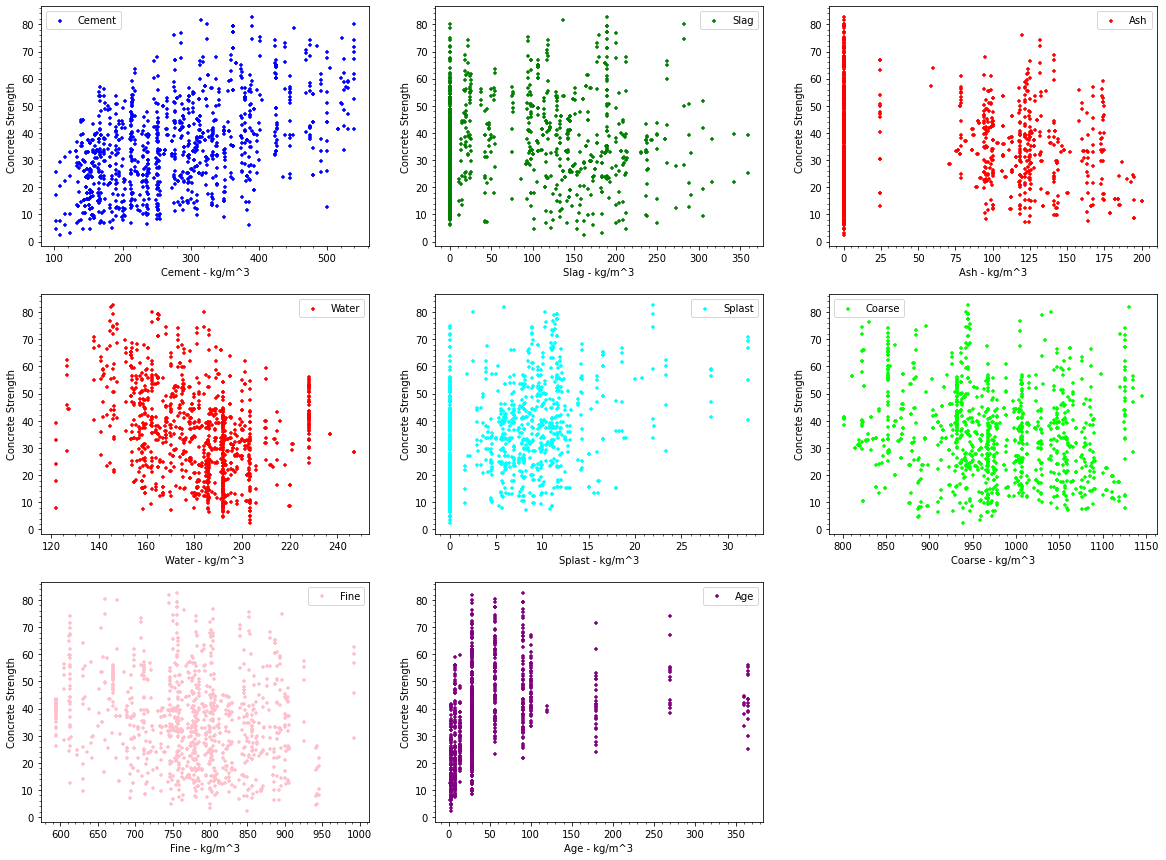

In [5]:
# Let's see what our data looks like
%matplotlib inline

# Set graph size
plt.figure(figsize=(20,15))

#Plotting data - Cement 
plt.subplot(331)

plt.scatter(df['cement'], df['strength'], color='blue', marker = '+', s=20, label = 'Cement')
plt.xlabel('Cement - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Slag 
plt.subplot(332)

plt.scatter(df['slag'], df['strength'], color='green', marker = '+', s=20, label = 'Slag')
plt.xlabel('Slag - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Ash 
plt.subplot(333)

plt.scatter(df['ash'], df['strength'], color='red', marker = '+', s=20, label = 'Ash')
plt.xlabel('Ash - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Water 
plt.subplot(334)

plt.scatter(df['water'], df['strength'], color='red', marker = '+', s=20, label = 'Water')
plt.xlabel('Water - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Splast 
plt.subplot(335)

plt.scatter(df['splast'], df['strength'], color='cyan', marker = '+', s=20, label = 'Splast')
plt.xlabel('Splast - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Coarse 
plt.subplot(336)

plt.scatter(df['coarse'], df['strength'], color='lime', marker = '+', s=20, label = 'Coarse')
plt.xlabel('Coarse - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Fine 
plt.subplot(337)

plt.scatter(df['fine'], df['strength'], color='pink', marker = '+', s=20, label = 'Fine')
plt.xlabel('Fine - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################
#Plotting data - Age 
plt.subplot(338)

plt.scatter(df['age'], df['strength'], color='purple', marker = '+', s=20, label = 'Age')
plt.xlabel('Age - kg/m^3')
plt.ylabel('Concrete Strength')
plt.minorticks_on()
plt.legend()
#################################################################

We can see that with each of the attribute; there's no strong trend, only cement has a loosley "positive" trend.

This could indicate that, cement is the most important attribute regarding concrete strength.
#### Higher cement amount = High concrete strength

## **Question for Bruno and or Shanghua!!** - 1 

#### 1.1) What model to use if there's no trend between variables? 
#### 1.2) What would you do in this situation?

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

## Creating Regression Models

In [6]:
print(f"{cols}")

['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']


### Splitting Data - For Training/Testing 

In [126]:
# Splitting data; train / test - better model implementation practice
## Cement
x_cement = df['cement']
x_cement = x_cement.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Slag
x_slag   = df['slag']
x_slag = x_slag.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Ash
x_ash    = df['ash']
x_ash    = x_ash.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Water
x_water  = df['water']
x_water  = x_water.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Splast
x_splast = df['splast']
x_splast = x_splast.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Coarse
x_coarse = df['coarse']
x_coarse = x_coarse.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Fine
x_fine   = df['fine']
x_fine   = x_fine.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Age
x_age    = df['age']
x_age    = x_age.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model
##################################################################################################################

## Strength
y = df['strength'] # This is the final variable we want to predict, so it remains as it is. 

### Cement

In [180]:
## Cement

#Splitting Data
x_train_cement, x_test_cement, y_train, y_test = train_test_split(x_cement, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_cement = linear_model.LinearRegression()
cement_model = lin_reg_cement.fit(x_train_cement, y_train)

cement_model.predict([[314]])

array([38.99276464])

In [181]:
# Getting score of our regression model
cement_model.score(x_test_cement, y_test)

0.16676809284424565

### Slag

In [162]:
## Slag

#Splitting Data
x_train_slag, x_test_slag, y_train, y_test = train_test_split(x_slag, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_slag = linear_model.LinearRegression()
slag_model = lin_reg_slag.fit(x_train_slag, y_train)

slag_model.predict([[126]])


array([36.42174617])

In [163]:
slag_model.score(x_test_slag, y_test)

0.015388433252671585

### Ash

In [164]:
## Ash

#Splitting Data
x_train_ash, x_test_ash, y_train, y_test = train_test_split(x_ash, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_ash = linear_model.LinearRegression()
ash_model = lin_reg_ash.fit(x_train_ash, y_train)

ash_model.predict([[412]])

array([26.1888723])

In [165]:
# Getting score of our regression model
ash_model.score(x_test_ash, y_test)

0.011916903598067519

### Water

In [166]:
## Water

#Splitting Data
x_train_water, x_test_water, y_train, y_test = train_test_split(x_water, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_water = linear_model.LinearRegression()
water_model = lin_reg_water.fit(x_train_water, y_train)

water_model.predict([[122]])

array([49.73225161])

In [167]:
# Getting score of our regression model
water_model.score(x_test_water, y_test)

0.04243004260592853

### Splast

In [168]:
## Splast
x_train_splast, x_test_splast, y_train, y_test = train_test_split(x_splast, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_splast = linear_model.LinearRegression()
splast_model = lin_reg_splast.fit(x_train_splast, y_train)

splast_model.predict([[123]])

array([162.51654696])

In [169]:
# Getting score of our regression model
splast_model.score(x_test_splast, y_test)

0.07579399620777061

### Coarse

In [170]:
## Coarse

#Splitting Data
x_train_coarse, x_test_coarse, y_train, y_test = train_test_split(x_coarse, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_coarse = linear_model.LinearRegression()
coarse_model = lin_reg_coarse.fit(x_train_coarse, y_train)

coarse_model.predict([[123]])

array([69.02590686])

In [171]:
# Getting score of our regression model
coarse_model.score(x_test_coarse, y_test)

-0.007846005166734615

### Fine

In [172]:
## Fine

#Splitting Data
x_train_fine, x_test_fine, y_train, y_test = train_test_split(x_fine, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_fine = linear_model.LinearRegression()
fine_model = lin_reg_fine.fit(x_train_fine, y_train)

fine_model.predict([[512]])

array([45.64784713])

In [173]:
# Getting score of our regression model
fine_model.score(x_test_fine, y_test)

0.010026613427936315

### Age

In [176]:
## Age

#Splitting Data
x_train_age, x_test_age, y_train, y_test = train_test_split(x_age, y, test_size = 0.2) # 20% = Test, 80% = Train

# Assigning LR model
lin_reg_age = linear_model.LinearRegression()
age_model = lin_reg_age.fit(x_train_age, y_train)

age_model.predict([[127]])

array([42.9976924])

In [182]:
# Getting score of our regression model
age_model.score(x_test_age, y_test)

-0.2130803329345046

## **Question for Bruno and or Shanghua!!** - 2

#### 2.1) Method to find the best score for model? Finding the best batch of training data
#### ** Example - Bruno's presentations, there are many graphs of the same model, continuously iterating - is that to find the optimal training set to attain the highest model score?

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Visualisation - Attributes' Model

#### ** Use test data for each attribute and visualise **

#### Here we visualise, again, visualise each attribute. However, also plotting the best fit line for each attribute.